### The enviroment is python 3.7.9 and tensorflow 1.15.0
### This is an exemplary codepiece used to check textual similarity between the given verbs and a pre-set verb list. given verbs: install, lift; a pre-set verb list: {pick,drop,push,pull,rotate,move,place}. The similarity threshold is set as 0.5. The language model is the [Universal Sentence Encoder](https://research.google/pubs/universal-sentence-encoder/).

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[0.9999998  0.507642   0.42777082 0.49384803 0.3815073  0.40795007
  0.5584668  0.3057363  0.32911983]
 [0.507642   0.9999999  0.60719305 0.75766075 0.5487186  0.48549134
  0.5733621  0.35810494 0.4981475 ]
 [0.42777082 0.60719305 1.         0.74845433 0.5660069  0.49913615
  0.61150527 0.42621642 0.612613  ]
 [0.49384803 0.75766075 0.74845433 1.         0.6191313  0.5380384
  0.58778703 0.44642526 0.593113  ]
 [0.3815073  0.5487186  0.5660069  0.6191313  0.99999976 0.46885633
  0.56407094 0.45703393 0.48334   ]
 [0.40795007 0.48549134 0.49913615 0.5380384  0.46885633 1.
  0.59937197 0.42760313 0.40505847]
 [0.5584668  0.5733621  0.61150527 0.58778703 0.56407094 0.59937197
  1.         0.3693799  0.53200704]
 [0.3057363  0.35810494 0.42621642 0.44642526 0.45703393 0.42760313
  0.3693799  1.0000004  0.37330127]
 [0.32911983 0.4981475  0.612613   0.593113   0.48334    0.40505847
  0.53200704 0.37330127 1.        ]]


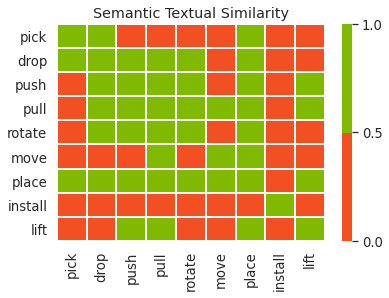

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import BoundaryNorm, ListedColormap
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
embed = hub.Module(module_url)

def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  print(corr)
  sns.set(font_scale=1.2)
  my_colors = ['#F25022', '#7FBA00']
  my_cmap = ListedColormap(my_colors)
  bounds = [0, 0.50, 1]
  my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap=my_cmap,
      norm=my_norm,
      linewidths=1, 
      linecolor='white')
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)
messages = [
    "pick",
    "drop",
    "push",
    "pull",
    "rotate",
    "move",
    "place",
    "install",
    "lift"

]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)